## Evaluation Project - 2
# Avacado Project
#### Problem Statement:
* Avocado is a fruit consumed by people heavily in the United States. 

Content                                                                                                  
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.                       

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes   directly from retailers’ cash registers based on actual retail sales of Hass avocados.                                      
                                                                                                                        
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an         aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the  table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.                    
                                            
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.                           
                                            

In [409]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [204]:
# load the dataset
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Some relevant columns in the dataset:           
                                    
Date - The date of the observation                      
AveragePrice - the average price of a single avocado            
type - conventional or organic                
year - the year                                 
Region - the city or region of the observation       
Total Volume - Total number of avocados sold           
4046 - Total number of avocados with PLU 4046 sold        
4225 - Total number of avocados with PLU 4225 sold        
4770 - Total number of avocados with PLU 4770 sold  

In [205]:
# checking shape of dataset and info
print('shape of dataset: ',df.shape)
df.info()

shape of dataset:  (18249, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Dataset has 18249 rows and 14 columns  
Date, type, region contains object data while year, unnamed contains integers data and all other columns contains float data

In [206]:
# checking missing vaules in dataset
cols = df.columns
for i in cols:
    print(df.loc[df[i]==" "].sum().sum())

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


there is no dupicated row in dataest

In [207]:
# checking null values in dataset
df.isnull().sum().sum()

0

no null value is there

In [208]:
# checking duplicate values
df.duplicated().sum()

0

no duplicates are there in dataset

In [209]:
# checking value count of unnamed and XLarge bags 
print(df['Unnamed: 0'].value_counts())
print(df['XLarge Bags'].value_counts())

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64
0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64


i checked value count of these columns as i thought unnamed has index value and Xlarge bags contain on zeros now it is clear that i was wrong

In [210]:
# sheckin stats of dataset (int and float columns)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


In column 4046, 4225, 4770 there is much deviation or i can say difference in quantile range so i guess ther may outliers exist 
same difference in quantile range of columns Xlarge can be seen i'll confirm outliers in visualisation part 

In [211]:
# checking stats of object data
df.describe(include=['O'])

,Date,type,region
count,18249,18249,18249
unique,169,2,54
top,2015-12-27,conventional,Albany
freq,108,9126,338


i will plot grapha and see distribution of these columns as here is see there are 54 regions

In [212]:
# checking skewness
df.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

all the columns are highly skewed except unnamed and year as skewness is much more than 0.5(all skewed columns has skewness around 8 to 10 ) i'll also see it in visualisation part 

In [213]:
# applying label encoding to convert object data into float
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
df1 = lab_enc.fit_transform(df['Date'])
pd.DataFrame(df1)
df['Date'] = df1

In [214]:
lab_enc = LabelEncoder()
df2 = lab_enc.fit_transform(df['type'])
pd.DataFrame(df2)
df['type'] = df2

In [215]:
lab_enc = LabelEncoder()
df3 = lab_enc.fit_transform(df['region'])
pd.DataFrame(df3)
df['region'] = df3
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


now all data is in numerical form so machine can understand it now

<AxesSubplot:>

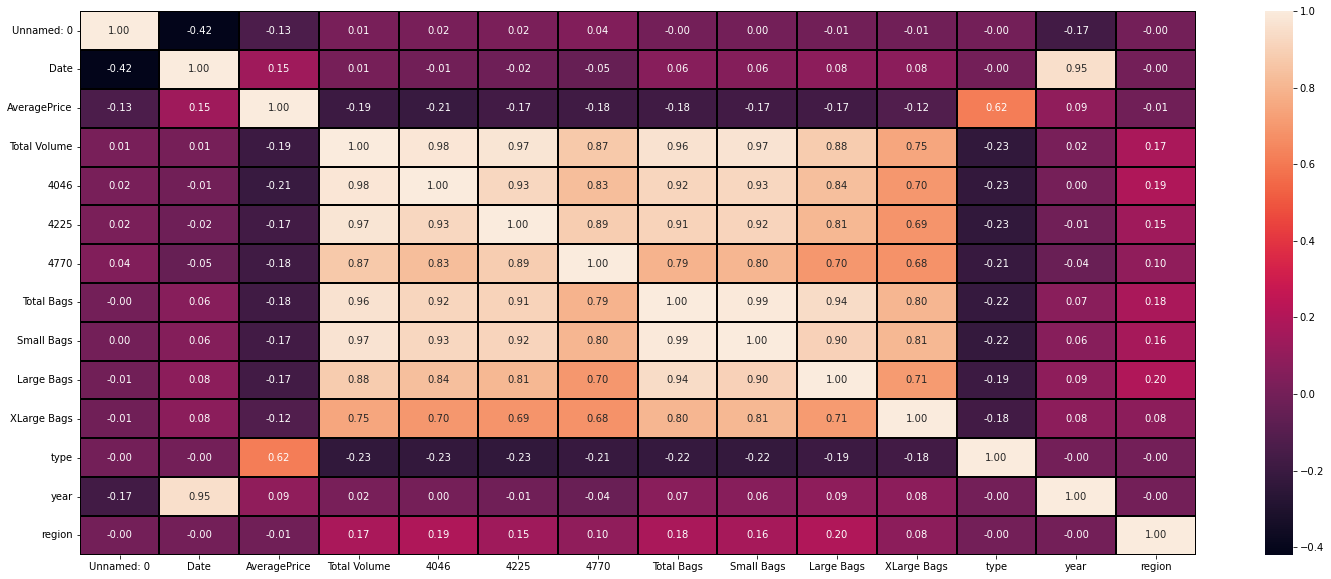

In [216]:
# checking correlation in columns using heatmap
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linecolor='black',linewidths=0.1)

unnamed, year,date are very less correlated with every other column           
data and year are highly correlated
and execpt averageprice(label) and unnamed all other columns have multicolliarity as correlation value is close to 1
and avgprice is correlated with type

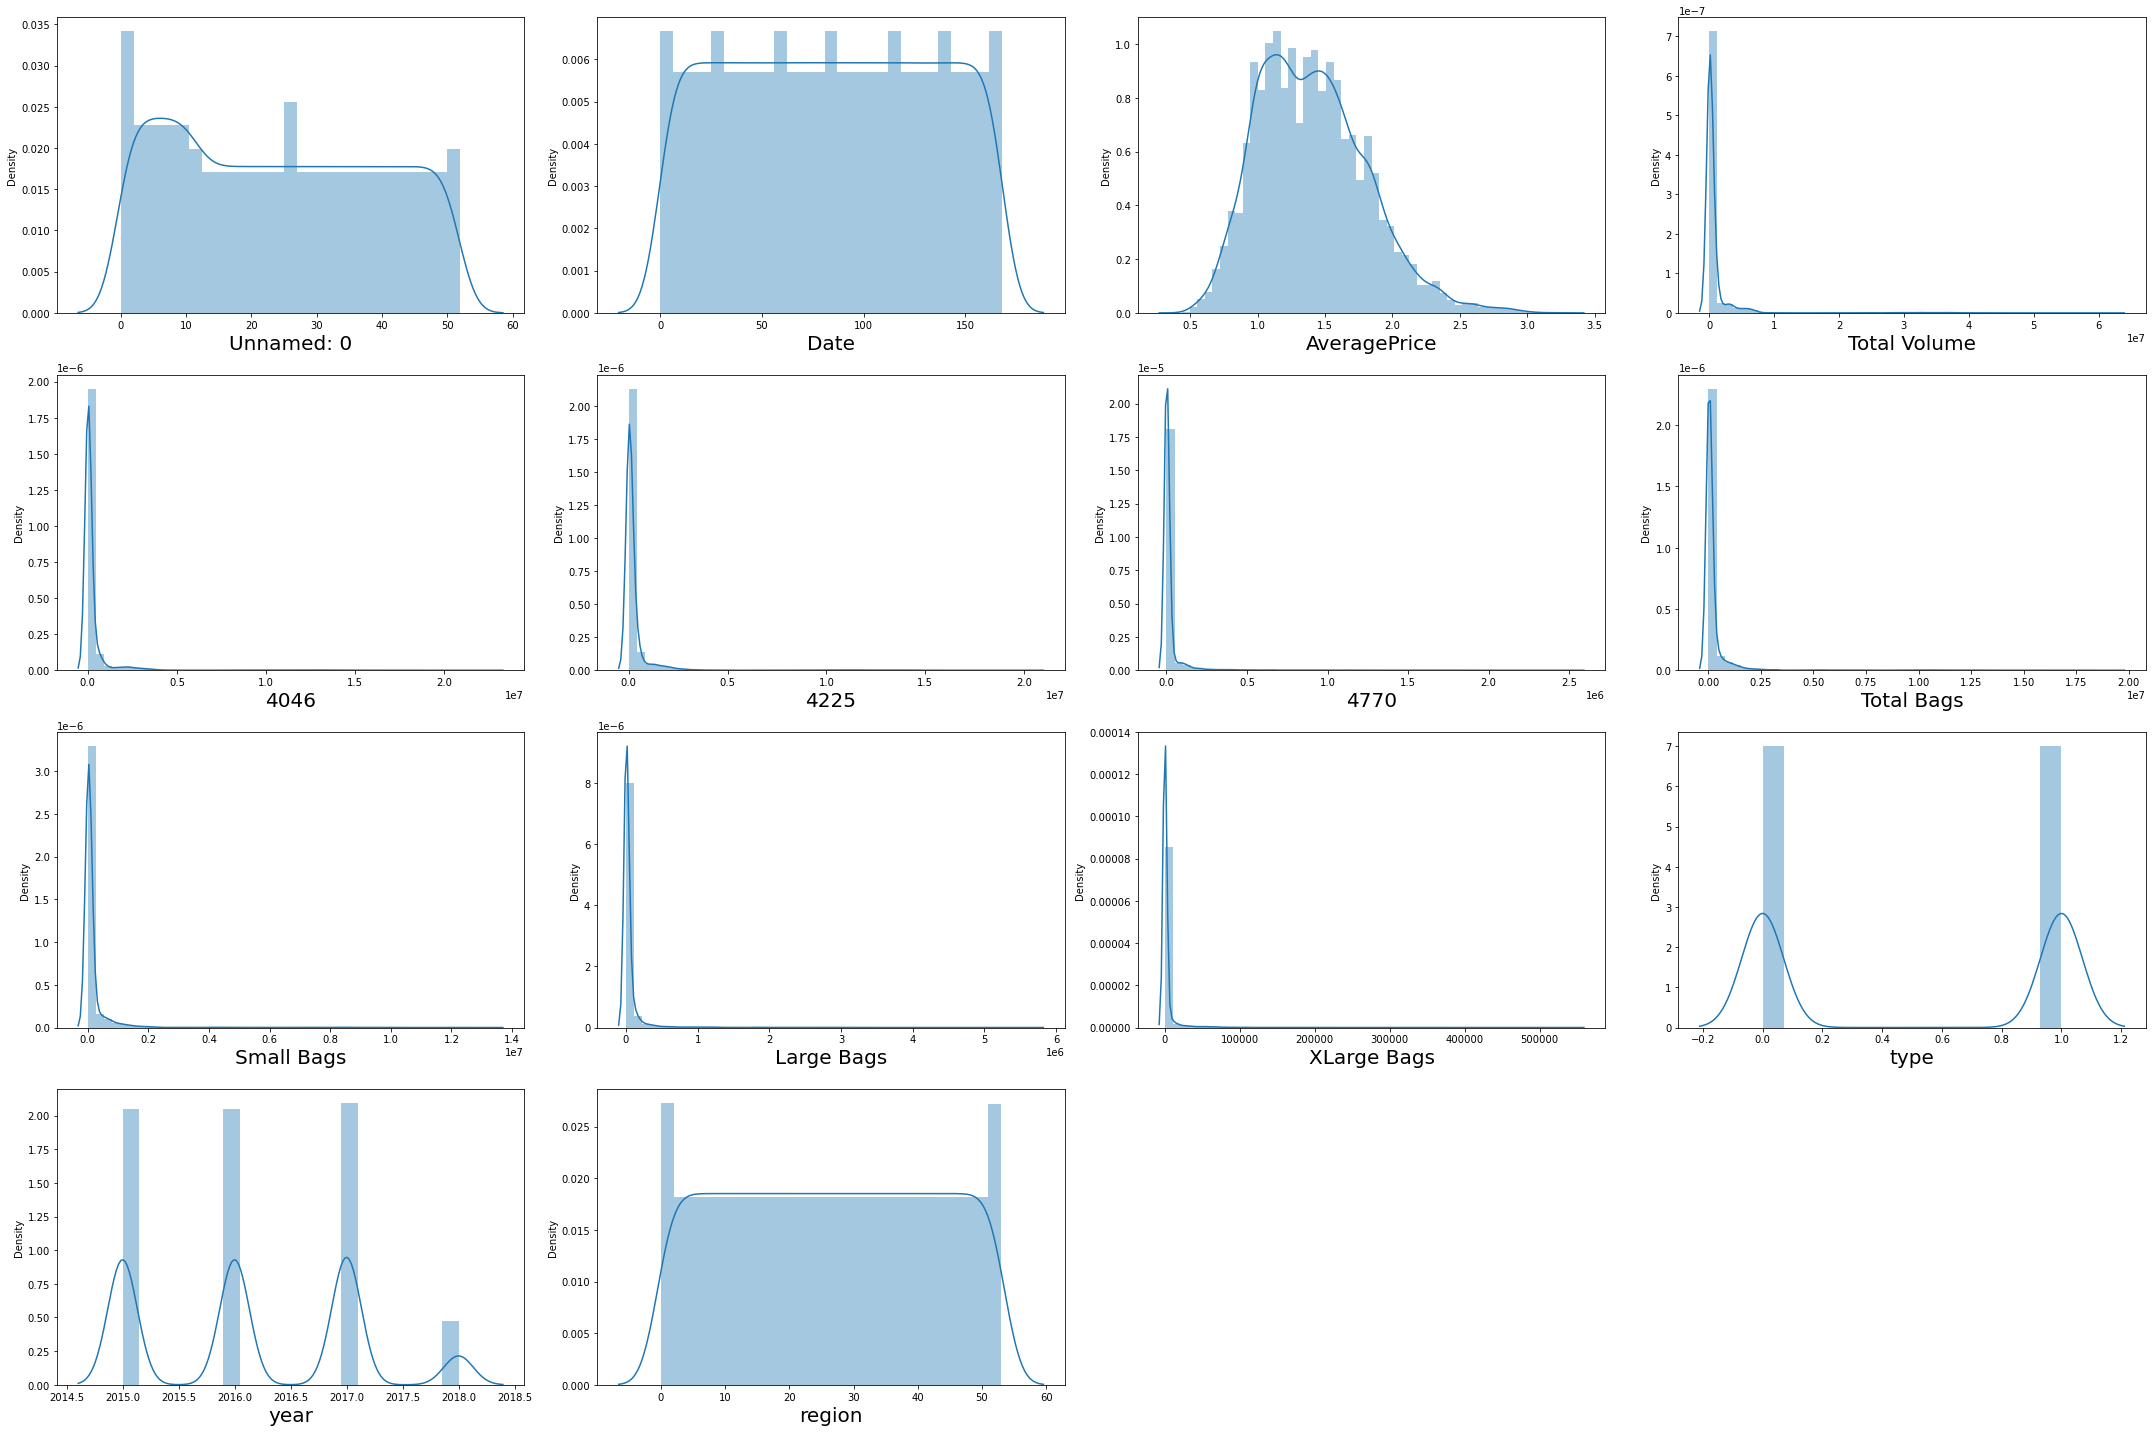

In [217]:
# checking kewness by visualing data distribution
plt.figure(figsize = (30,20))
plotnumber = 1

for column in df:
    if plotnumber<=14:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

except region, averageprice, date and unnamed  all other columns are highly correlated

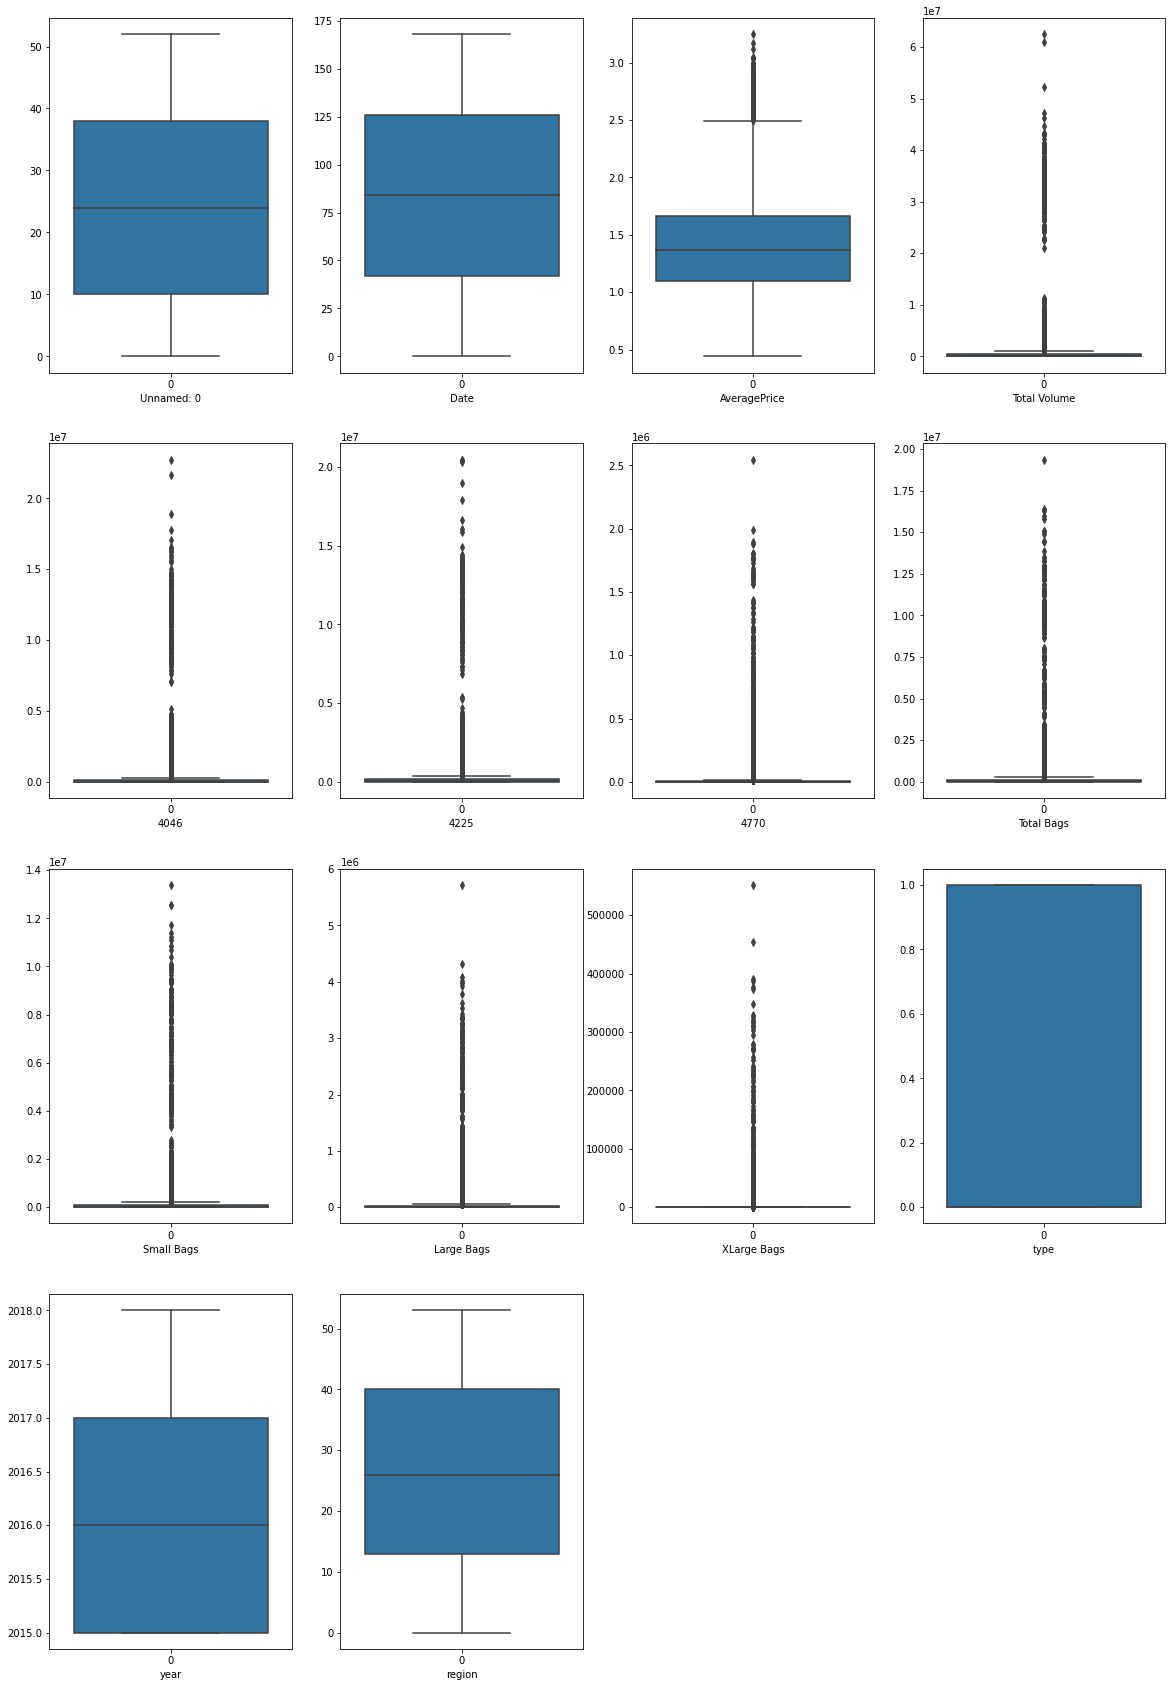

In [218]:
# checking outliers in dataset
plt.figure(figsize=(20,30))
point = 1
for column in df:
    if point<=14:
        plt.subplot(4,4,point)
        ax = sns.boxplot(data = df[column])
        plt.xlabel(column,fontsize=10)
    point+=1
plt.show()

except unnamed, date, type,year and region all columns contains lots of outliers

Now i will move to data cleaning part                    
Now i am gonna build model to predict averageprice and form above heatmap and other visualiasation tools i find that only type columns is highly correlated to Average price                           
and from correlated columns i selected 4046 column as it is more corrlelated with Averageprice among them

In [219]:
# separating features and label
df_r = df.drop(columns=['Unnamed: 0', 'Date', 'Total Volume', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'year', 'region',])

In [220]:
df_r

,AveragePrice,4046,type
0,1.33,1036.74,0
1,1.35,674.28,0
2,0.93,794.70,0
3,1.08,1132.00,0
4,1.28,941.48,0
...,...,...,...
18244,1.63,2046.96,1
18245,1.71,1191.70,1
18246,1.87,1191.92,1
18247,1.93,1527.63,1


In [221]:
# removing outlier from df_r using zscore
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_r))
threshold=3
np.where(z>3)

(array([  346,   359,  2368,  2370,  2652,  2653,  2654,  2655,  2656,
         2657,  2658,  2659,  2660,  2661,  2662,  2663,  2664,  2665,
         2666,  2667,  2668,  2669,  2670,  2671,  2672,  2673,  2674,
         2675,  2676,  2677,  2678,  2679,  2680,  2681,  2682,  2683,
         2684,  2685,  2686,  2687,  2688,  2689,  2690,  2691,  2692,
         2693,  2694,  2695,  2696,  2697,  2698,  2699,  2700,  2701,
         2702,  2703,  5460,  5461,  5462,  5463,  5464,  5465,  5466,
         5467,  5468,  5469,  5470,  5471,  5472,  5473,  5474,  5475,
         5476,  5477,  5478,  5479,  5480,  5481,  5482,  5483,  5484,
         5485,  5486,  5487,  5488,  5489,  5490,  5491,  5492,  5493,
         5494,  5495,  5496,  5497,  5498,  5499,  5500,  5501,  5502,
         5503,  5504,  5505,  5506,  5507,  5508,  5509,  5510,  5511,
         8035,  8045,  8048,  8051,  8319,  8320,  8321,  8322,  8323,
         8324,  8325,  8326,  8327,  8328,  8329,  8330,  8331,  8332,
      

In [222]:
df_r=df_r[(z<3).all(axis=1)]
df_r

,AveragePrice,4046,type
0,1.33,1036.74,0
1,1.35,674.28,0
2,0.93,794.70,0
3,1.08,1132.00,0
4,1.28,941.48,0
...,...,...,...
18244,1.63,2046.96,1
18245,1.71,1191.70,1
18246,1.87,1191.92,1
18247,1.93,1527.63,1


## Building regression models for AveragePrice 

#### linear regression

In [226]:
# separating features and column
x = df_r.drop(columns=['AveragePrice'])
y = df_r.AveragePrice

In [229]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [231]:
# training the model with train data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr = LinearRegression()
# searching best random state to get best train and test accuracy
from sklearn.metrics import r2_score
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    print(f"at random state {i},the training accuracy is : ,{lr.score(x_train,y_train)}")
    print(f"at random state {i},the testing accuracy is : ,{lr.score(x_test,y_test)}")
    print("\n")

at random state 0,the training accuracy is : ,0.4087495433856835
at random state 0,the testing accuracy is : ,0.37404375561768866


at random state 1,the training accuracy is : ,0.40107186031527653
at random state 1,the testing accuracy is : ,0.40434325970721496


at random state 2,the training accuracy is : ,0.40287827420617006
at random state 2,the testing accuracy is : ,0.3976502837085927


at random state 3,the training accuracy is : ,0.40273133237836756
at random state 3,the testing accuracy is : ,0.39825406700012844


at random state 4,the training accuracy is : ,0.40119940773139007
at random state 4,the testing accuracy is : ,0.40422581757668663


at random state 5,the training accuracy is : ,0.3996076232585549
at random state 5,the testing accuracy is : ,0.4103908992181866


at random state 6,the training accuracy is : ,0.3990865200728593
at random state 6,the testing accuracy is : ,0.41316990233891904


at random state 7,the training accuracy is : ,0.40442900846377317
at rando

by checking manually i find the best random state 25 as at this random state the difference between train and test score is minimum so i wll go with 25 random state

In [242]:
# spliting data with random state 82
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=25)

In [243]:
# checking train sccore 
lr.fit(x_train,y_train)
print("traing score",lr.score(x_train,y_train)*100)
# checking test score
print("testing score",lr.score(x_test,y_test)*100)

traing score 40.12458754745645
testing score 40.42593615959279


now test and test score is equal and it is 40% which is good so but model learned less

In [244]:
# now checking model accuracy by comparing actual and predicted value
from sklearn import metrics
y_pred = lr.predict(x_test)
print("****accuracy****")
print(metrics.r2_score(y_test,y_pred)*100)

****accuracy****
40.42593615959279


model is giving 40% accuracy

In [245]:
# checking RMSE 
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred = lr.predict(x_test)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  0.2971143890771233


error is less which is good

In [246]:
# Regularisation
# lasso
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
lassocv = LassoCV(alphas=None , max_iter=100 , normalize = True)
lassocv.fit(x_train,y_train)
alpha = lassocv.alpha_
alpha

1.9913582130387556e-06

In [247]:
# now train with alpha
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1.9913582130387556e-06)

In [248]:
lasso_reg.score(x_test,y_test)*100

40.42592666075711

lasso is giving text score 40% and without lasso model text score is 40% so i can say that model is not over fitting 

In [250]:
# ridge
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [251]:
ridge_model = Ridge(ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [252]:
ridge_model.score(x_test,y_test)

0.40425936108136873

it is also giving same texting score as above so my conclusion is correct

#### AdaBoost

In [254]:
# traing with adaBoost
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [255]:
# model prediction on train data and checking accuracy
y_pred = ada.predict(x_train)
accuracy = metrics.r2_score(y_train,y_pred)
print('R Square Score : ',accuracy)

R Square Score :  0.42217002569244566


model is predicting train data 42% accuractly let's  check with text data

In [256]:
# predicting the test data with the result
y_test_pred = ada.predict(x_test)
accuracy = metrics.r2_score(y_test,y_test_pred)
print('R Square Score :- ',accuracy)

R Square Score :-  0.4282020919249493


Now to accuracy is 42% only with the text data,  which is less may model is overfitting let's check

In [266]:
# cross validation if the model is overfitting
from sklearn.model_selection import KFold,cross_val_score
cross_val_score(ada,x_scaled,y,cv=3).mean()

0.04406404307049183

model is not over fitting

In [267]:
# Hyperparameter tuning to increase accuracy using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators':[20,35,47,50,60,70,80,100], 'learning_rate':[0.25,0.30,0.40]}

In [268]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions = params)
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [20, 35, 47, 50, 60, 70,
                                                         80, 100]})

In [269]:
rnd_srch.fit(x_train,y_train)
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.25, n_estimators=35)

In [275]:
# train the data with tuned prameter
ada = AdaBoostRegressor(learning_rate=0.25,n_estimators=35)
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)
print("****accuracy post tuning****")
print(metrics.r2_score(y_test,y_pred))

****accuracy post tuning****
0.4326616683759169


accuracy is increased by one percent

#### Knn

In [277]:
# training data with knn
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [278]:
# checking accuracy
y_pred = knn.predict(x_test)
print('accuracy = ',metrics.r2_score(y_test,y_pred))

accuracy =  0.3399999044219081


it is giving less accuracy as compared to above models let's check overfitting/under fitting

In [285]:
# cross validation of model
from sklearn.model_selection import KFold,cross_val_score
cross_val_score(knn,x_scaled,y,cv=9).mean()

-0.17227794478288738

as cross_val score is less than accuracy so the model is over fitting

In [286]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_drid = {'algorithm': ['kd_tree','brute'],
             'leaf_size':[3,4,5,6,7,8],
             'n_neighbors':[3,4,7,9,11,13]
             }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_drid)

In [287]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 4, 5, 6, 7, 8],
                         'n_neighbors': [3, 4, 7, 9, 11, 13]})

In [288]:
gridsearch.best_params_

{'algorithm': 'brute', 'leaf_size': 3, 'n_neighbors': 13}

In [294]:
knn = KNeighborsRegressor(algorithm = 'brute', leaf_size = 3, n_neighbors=13)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("****accuracy post tuning****")
print(metrics.r2_score(y_test,y_pred))

****accuracy post tuning****
0.40431970515228355


it is giving accuracy 40%, accuracy is incresed by 7 % with the help of parameter tuning 

#### SVM

In [295]:
# training model with SVM
from sklearn.svm import SVR
svr = SVR()

# model training and score
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)
print('accuracy : ',metrics.r2_score(y_test,y_pred))

accuracy :  0.4251506973040783


model is giving better accuracy than above

In [296]:
# crossvalidation
from sklearn.model_selection import KFold,cross_val_score
cross_val_score(svr,x,y,cv=2).mean()

-1.3471933713074369

it is giving -ve value mean may be because data set is very small and model is underfitting

In [298]:
# hyperparameter tuning
param_grid = {'C':[1,5,10,20],
              'gamma':[0.001,0.01,0.2,0.002]
             }
gridsearch = GridSearchCV(svr, param_grid)

gridsearch.fit(x_train,y_train)

# best param
gridsearch.best_params_

{'C': 20, 'gamma': 0.2}

In [300]:
svr = SVR(C=20,gamma=0.2)

# model training and score
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

print('post tuning accuracy :',metrics.r2_score(y_test,y_pred)*100)

post tuning accuracy : 42.569572143472854


i will go with svr model as it gives mode accuracy

In [301]:
# saving the model
import pickle
filename = "AvgPrive"
pickle.dump(svr,open(filename,'wb'))

In [302]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,161,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,8,160,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,9,159,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,10,158,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


## Building classification model for region

<AxesSubplot:>

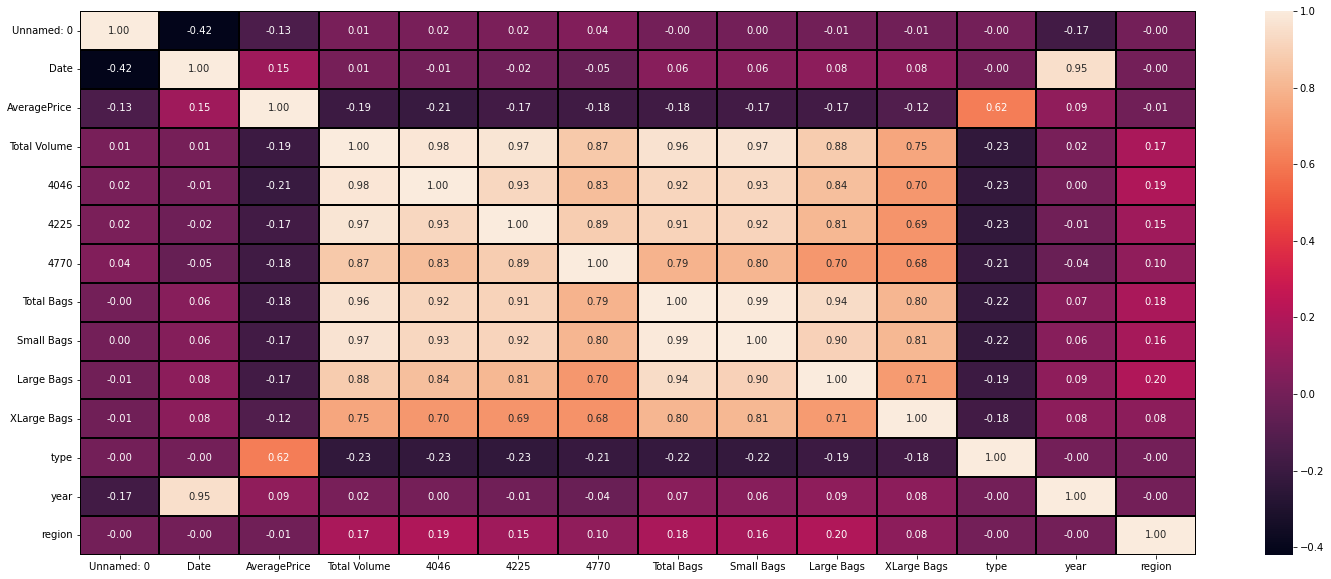

In [303]:
# checking correlation in columns using heatmap
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linecolor='black',linewidths=0.1)

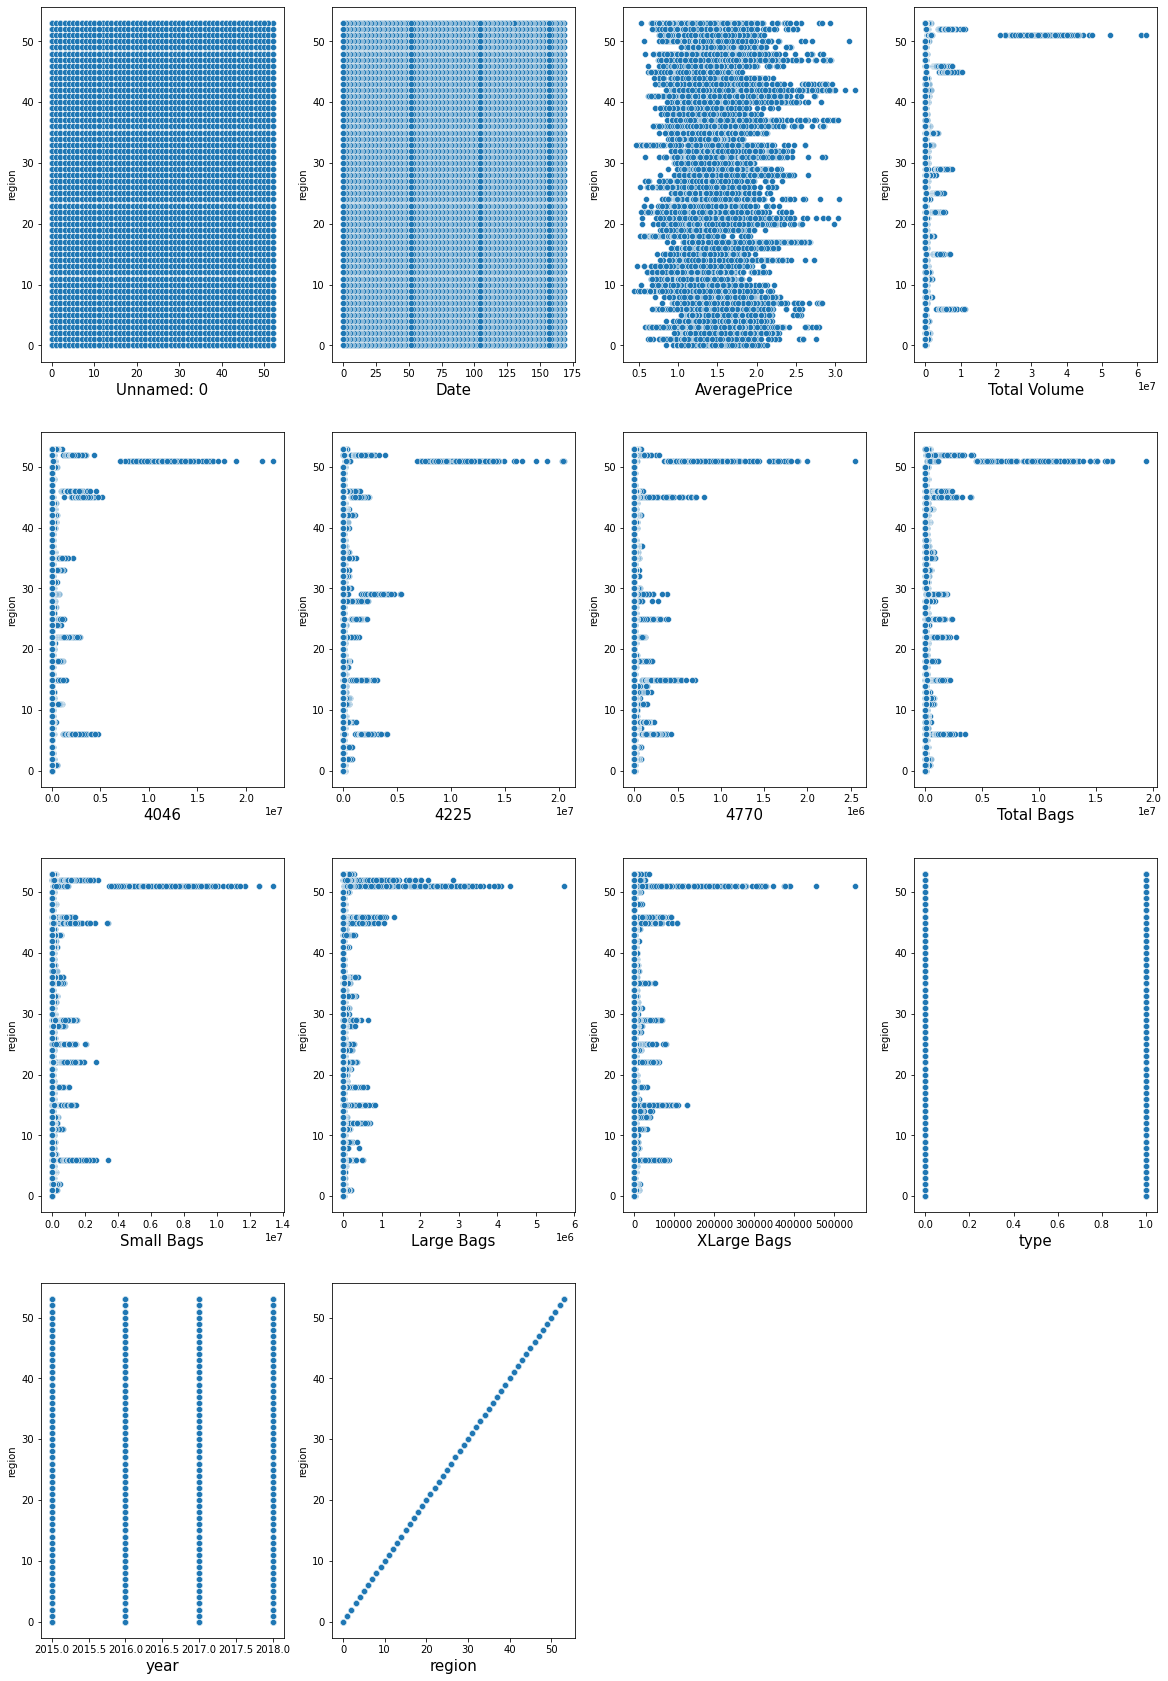

In [304]:
# checking relation with target column
plt.figure(figsize=(20,30))
plotnumber = 1
for column in df:
    if plotnumber<=14:
        plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=df[column],y=df.region)
        plt.xlabel(column,fontsize = 15)
    plotnumber+=1
plt.show()

i see some little trend in 'Total Volume', '4046', '4225','4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'

but these columns are correlated with each other so i select total volumne and total bages on the basis of correlation 

In [309]:
df = df.drop(columns = ['Unnamed: 0', 'Date', 'AveragePrice',  '4046', '4225',
       '4770', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year'])

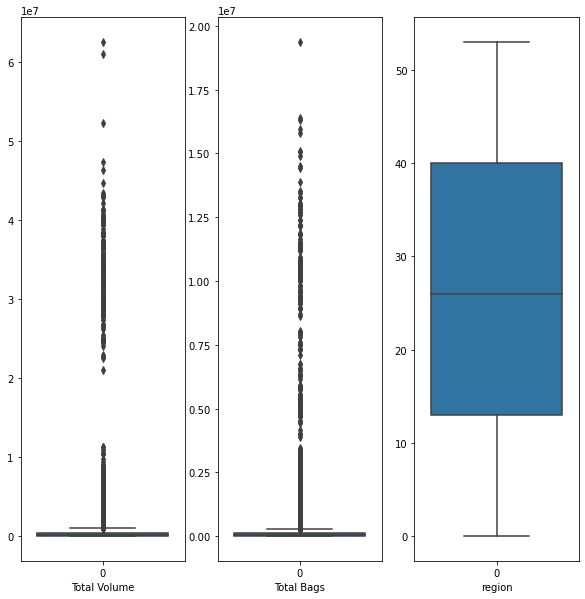

In [316]:
# checking outliers
# checking outliers in dataset
plt.figure(figsize=(10,10))
point = 1
for column in df:
    if point<=3:
        plt.subplot(1,3,point)
        ax = sns.boxplot(data = df[column])
        plt.xlabel(column,fontsize=10)
    point+=1
plt.show()

In [362]:
# removing outliers 
min_a, max_a = df['Total Volume'].quantile([0.000, 0.95])
min_a, max_a

(588.87, 20410.949)

<AxesSubplot:xlabel='Total Volume'>

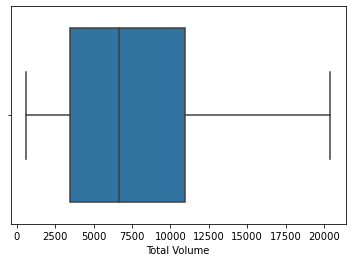

In [363]:
# removing rows containing ouotliers
df = df[(df['Total Volume']<max_a)&(df['Total Volume']>min_a)]
# checking outliers
sns.boxplot(x=df['Total Volume'])

<AxesSubplot:xlabel='Total Bags'>

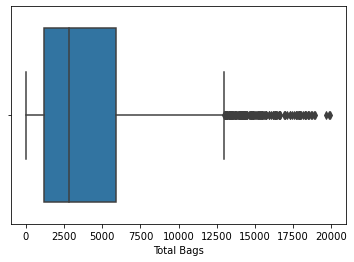

In [365]:
sns.boxplot(x=df['Total Bags'])

In [375]:
# removing outliers 
min_a, max_a = df['Total Bags'].quantile([0.000, 0.99])
min_a, max_a

(3.19, 11585.508800000001)

<AxesSubplot:xlabel='Total Bags'>

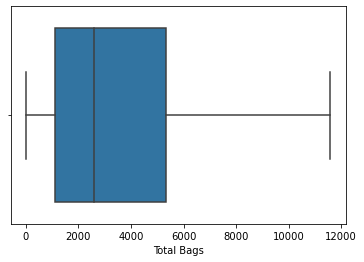

In [376]:
# removing rows containing ouotliers
df = df[(df['Total Bags']<max_a)&(df['Total Bags']>min_a)]
# checking outliers
sns.boxplot(x=df['Total Bags'])

outliers are removed

In [377]:
df.shape

(5785, 3)

In [386]:
# separating features and label
x = df.drop(columns=['region'])
y = df.region

In [392]:
# using PowerTransformer to remove skewness
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
x = scaler.fit_transform(x.values)

In [402]:
x.shape

(5785, 2)

### model building

In [423]:
# spliting data into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=955)

In [424]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [425]:
# one function to call as many as times to check accuracy score of different model
def metric_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n==================== Train Result =======================")
        
        print(f"Accuracy score :{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n===================== Test Result =======================")
        
        print(f"Accuracy score :{accuracy_score(y_test, pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n',classification_report(y_test, pred,digits=2))

In [426]:
# call the function and pass dataset to check the train and test score
metric_score(log_reg,x_train,x_test,y_train,y_test, train=True) # for tarining score

metric_score(log_reg,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :16.08%

===================== Test Result =======================
Accuracy score :16.42%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.24      0.61      0.34        33
           1       0.11      0.05      0.07        19
           2       0.15      0.24      0.18        17
           3       0.23      0.14      0.18        42
           4       0.00      0.00      0.00        17
           5       0.16      0.41      0.23        29
           7       0.06      0.08      0.07        36
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00        17
          14       0.20      0.32      0.24   

i guess random state is not good lets tune the parameter

In [427]:
drid_param = {
    'penalty':['l1','l2','elasticnet','none'],
    'C':np.logspace(-4,4,20),
    'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter':[100,1000,2500,5000]
}

In [428]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=log_reg,param_grid=drid_param,cv=5,
                           n_jobs=-1)

In [429]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']})

In [430]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 29.763514416313132, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [431]:
# training data again with tuned parameter
log_reg = LogisticRegression(C=29.763514416313132,max_iter=100,penalty='l2',solver='liblinear')
log_reg.fit(x_train,y_train)

LogisticRegression(C=29.763514416313132, solver='liblinear')

In [432]:
# checking the accuracy after tuning
metric_score(log_reg,x_train,x_test,y_train,y_test, train=True) # for tarining score

metric_score(log_reg,x_train,x_test,y_train,y_test, train=False) # for testing score7.


==================== Train Result =======================
Accuracy score :16.83%

===================== Test Result =======================
Accuracy score :17.37%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.36      0.61      0.45        33
           1       0.00      0.00      0.00        19
           2       0.15      0.29      0.20        17
           3       0.45      0.12      0.19        42
           4       0.00      0.00      0.00        17
           5       0.17      0.31      0.22        29
           7       0.10      0.08      0.09        36
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00        17
          14       0.22      0.62      0.32   

accuracy increased by 1 %

#### Decision tree

In [433]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [434]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True) # for tarining score

metric_score(clf,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :100.00%

===================== Test Result =======================
Accuracy score :16.34%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.50      0.45      0.48        33
           1       0.00      0.00      0.00        19
           2       0.08      0.06      0.07        17
           3       0.33      0.21      0.26        42
           4       0.08      0.06      0.07        17
           5       0.23      0.38      0.29        29
           7       0.12      0.08      0.10        36
           8       0.25      0.12      0.17         8
           9       0.05      0.05      0.05        20
          10       0.05      0.07      0.06        30
          11       0.14      0.15      0.15        13
          12       0.00      0.00      0.00         8
          13       0.19      0.24      0.21        17
          14       0.22      0.32      0.27  

In [438]:
#hyperparameter tuning
drid_param = {
    'criterion':['gini','entropy'],
    'max_depth': range(10,20),
    'min_samples_leaf': range(2,10),
    'min_samples_split': range(3,10),
    'max_leaf_nodes': range(5,10)
}

In [439]:
grid_search = GridSearchCV(estimator=clf,param_grid=drid_param,cv=5,
                           n_jobs=-1)

In [440]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 20),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [441]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [468]:
# initaiting DecisionTreeClassifier with new parameters and train
clf = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=4,max_depth=20,min_samples_leaf=3,max_leaf_nodes=100)

# train the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_leaf_nodes=100,
                       min_samples_leaf=3, min_samples_split=4)

In [469]:
# call the function and pass dataset to check the train and test score
metric_score(clf,x_train,x_test,y_train,y_test, train=True) # for tarining score

metric_score(clf,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :25.30%

===================== Test Result =======================
Accuracy score :17.46%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.24      0.27      0.26        33
           1       0.05      0.11      0.06        19
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        42
           4       0.00      0.00      0.00        17
           5       0.16      0.28      0.21        29
           7       0.18      0.33      0.23        36
           8       0.00      0.00      0.00         8
           9       0.06      0.10      0.08        20
          10       0.11      0.13      0.12        30
          11       0.19      0.31      0.24        13
          12       0.00      0.00      0.00         8
          13       0.43      0.18      0.25        17
          14       0.22      0.59      0.33   

accuracy increased by 1% 

### Adaboost

In [470]:
from sklearn.ensemble import AdaBoostClassifier

In [471]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [472]:
metric_score(ada,x_train,x_test,y_train,y_test, train=True) # for tarining score

metric_score(ada,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :8.77%

===================== Test Result =======================
Accuracy score :6.83%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        42
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00        29
           7       0.09      0.22      0.13        36
           8       0.01      0.12      0.03         8
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00        17
          14       0.00      0.00      0.00     

In [473]:
from sklearn.model_selection import GridSearchCV

In [474]:
params = {'n_estimators':[10,20,47,50,60,70,90,100], 'learning_rate':[0.25,0.30,0.40]}
grid_srch = GridSearchCV(AdaBoostClassifier(),cv=5,param_grid = params)
grid_srch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.25, 0.3, 0.4],
                         'n_estimators': [10, 20, 47, 50, 60, 70, 90, 100]})

In [475]:
grid_srch.best_estimator_

AdaBoostClassifier(learning_rate=0.4, n_estimators=47)

In [479]:
ada = AdaBoostClassifier(learning_rate=1,n_estimators=47)
ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=47)

In [480]:
metric_score(ada,x_train,x_test,y_train,y_test, train=True) # for tarining score

metric_score(ada,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :8.19%

===================== Test Result =======================
Accuracy score :7.43%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        42
           4       0.00      0.00      0.00        17
           5       0.14      0.03      0.06        29
           7       0.09      0.22      0.13        36
           8       0.01      0.12      0.03         8
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00        17
          14       0.00      0.00      0.00     

giving worst accuracy

### knn 

In [481]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [482]:
metric_score(knn,x_train,x_test,y_train,y_test, train=True) # for tarining score

metric_score(knn,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :41.31%

===================== Test Result =======================
Accuracy score :18.58%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.35      0.58      0.43        33
           1       0.04      0.16      0.06        19
           2       0.12      0.24      0.16        17
           3       0.22      0.26      0.24        42
           4       0.12      0.18      0.14        17
           5       0.22      0.34      0.27        29
           7       0.13      0.28      0.18        36
           8       0.25      0.38      0.30         8
           9       0.10      0.20      0.13        20
          10       0.02      0.03      0.03        30
          11       0.22      0.15      0.18        13
          12       0.00      0.00      0.00         8
          13       0.20      0.24      0.22        17
          14       0.20      0.29      0.24   

In [483]:
param_drid = {'algorithm': ['kd_tree','brute'],
             'leaf_size':[3,4,5,6,7,8],
             'n_neighbors':[3,4,7,9,11,13]
             }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_drid)

In [484]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 4, 5, 6, 7, 8],
                         'n_neighbors': [3, 4, 7, 9, 11, 13]})

In [485]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 11}

In [486]:
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors=11)

In [487]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=11)

In [488]:
# checking accuracy
metric_score(knn,x_train,x_test,y_train,y_test, train=True) # for tarining score

metric_score(knn,x_train,x_test,y_train,y_test, train=False) # for testing score


==================== Train Result =======================
Accuracy score :34.70%

===================== Test Result =======================
Accuracy score :19.88%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.37      0.58      0.45        33
           1       0.07      0.16      0.10        19
           2       0.14      0.18      0.15        17
           3       0.25      0.19      0.22        42
           4       0.07      0.12      0.09        17
           5       0.15      0.21      0.18        29
           7       0.13      0.25      0.17        36
           8       0.17      0.12      0.14         8
           9       0.10      0.15      0.12        20
          10       0.06      0.10      0.07        30
          11       0.11      0.08      0.09        13
          12       0.00      0.00      0.00         8
          13       0.15      0.24      0.19        17
          14       0.27      0.44      0.34   

accuracy is better than above models

### SVR

In [490]:
# svm
from sklearn.svm import SVC
svc = SVC()

# model training and score
svc.fit(x_train,y_train)

# call the function
# call the function and pass the dataset
metric_score(svc,x_train,x_test,y_train,y_test, train=True) # training score
metric_score(svc,x_train,x_test,y_train,y_test, train=False) # testing score


==================== Train Result =======================
Accuracy score :19.30%

===================== Test Result =======================
Accuracy score :18.67%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.28      0.70      0.40        33
           1       0.00      0.00      0.00        19
           2       0.21      0.24      0.22        17
           3       0.32      0.24      0.27        42
           4       0.00      0.00      0.00        17
           5       0.15      0.21      0.18        29
           7       0.14      0.31      0.19        36
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00        20
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00         8
          13       0.18      0.12      0.14        17
          14       0.26      0.56      0.35   

In [491]:
param_grid = {'C':[1,5,10,20],
              'gamma':[0.001,0.01,0.2,0.002]
             }
gridsearch = GridSearchCV(svc, param_grid)

gridsearch.fit(x_train,y_train)

# best param
gridsearch.best_params_

{'C': 20, 'gamma': 0.2}

In [492]:
# svm model training with new params and print score
svc = SVC(C=20,gamma=0.2)

# model training and score
svc.fit(x_train,y_train)

# call the function
# call the function and pass the dataset
metric_score(svc,x_train,x_test,y_train,y_test, train=True) # training score
metric_score(svc,x_train,x_test,y_train,y_test, train=False) # testing score



==================== Train Result =======================
Accuracy score :22.28%

===================== Test Result =======================
Accuracy score :23.51%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.51      0.58      0.54        33
           1       0.00      0.00      0.00        19
           2       0.19      0.18      0.18        17
           3       0.31      0.19      0.24        42
           4       0.00      0.00      0.00        17
           5       0.22      0.31      0.26        29
           7       0.15      0.28      0.19        36
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00        20
          10       0.20      0.07      0.10        30
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00         8
          13       0.20      0.12      0.15        17
          14       0.27      0.56      0.36   

svc model is giving best accuracy among all the models so i am  saving this

In [494]:
# saving the best model
import pickle
filename = 'region'
pickle.dump(svc, open(filename,'wb'))